Split text manually using Regex

###  **Regex Quick Reference Table**

| **Symbol / Pattern** | **Meaning**                       | **Example Match**             |      |                       |
| -------------------- | --------------------------------- | ----------------------------- | ---- | --------------------- |
| `.`                  | Any character (except newline)    | `c.t` → `cat`, `cut`          |      |                       |
| `\w`                 | Word character (A–Z, a–z, 0–9, _) | `\w+` → `Hello`               |      |                       |
| `\d`                 | Digit (0–9)                       | `\d+` → `123`                 |      |                       |
| `\s`                 | Whitespace                        | `\s+` → space, tab            |      |                       |
| `^`                  | Start of string                   | `^AI` → matches at beginning  |      |                       |
| `$`                  | End of string                     | `world$` → matches at end     |      |                       |
| `\b`                 | Word boundary                     | `\bAI\b` → “AI” not “AIs”     |      |                       |
| `*`                  | 0 or more times                   | `go*` → `g`, `go`, `goo`      |      |                       |
| `+`                  | 1 or more times                   | `go+` → `go`, `goo`           |      |                       |
| `?`                  | 0 or 1 time (optional)            | `colou?r` → `color`, `colour` |      |                       |
| `{n,m}`              | Between n and m repeats           | `a{2,4}` → `aa`, `aaa`        |      |                       |
| `[abc]`              | One of listed chars               | `[ch]at` → `cat`, `hat`       |      |                       |
| `[^abc]`             | Not a, b, or c                    | `[^a-z]` → non-lowercase      |      |                       |
| `(abc)`              | Capturing group                   | `(abc)+` → `abcabc`           |      |                       |
| `(?:abc)`            | Non-capturing group               | Used in token patterns        |      |                       |
| `                    | `                                 | OR (alternation)              | `cat | dog` → matches either |
| `(?=Y)`              | Lookahead (followed by Y)         | `\w+(?=\.)` → word before `.` |      |                       |
| `(?<=Y)`             | Lookbehind (preceded by Y)        | `(?<=@)\w+` → after `@`       |      |                       |
| `\\`                 | Escape special char               | `\.` → literal `.`            |      |                       |
| `re.I`               | Ignore case flag                  | `AI`, `ai`, `Ai` all match    |      |                       |

---

###  **Useful NLP Patterns**

| **Use Case**       | **Regex**                                        | **Example Match**        |
| ------------------ | ------------------------------------------------ | ------------------------ |
| Word (with hyphen) | `\b\w+(?:-\w+)*\b`                               | `New-York-based`         |
| Number (int/float) | `\d+(?:\.\d+)?`                                  | `42`, `3.14`             |
| Email              | `[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}` | `ai@unibo.it`            |
| Hashtag            | `#\w+`                                           | `#AI`                    |
| Mention            | `@\w+`                                           | `@zunaira`               |
| URL                | `https?://\S+`                                   | `https://huggingface.co` |
| Contraction        | `\b\w+'\w+\b`                                    | `don’t`, `it’s`          |




In [1]:
import re

# Example text
text = "Mr. Smith loves New-York-based startups, e.g., OpenAI or ChatGPT!"

# Basic regex pattern
pattern = r"\b\w+(?:-\w+)*\b" #Split text into meaningful tokens (words, numbers, hyphenated words, etc.)

# Find all tokens matching the pattern
tokens = re.findall(pattern, text)

print("Original Text:", text)
print("Tokens:", tokens)


Original Text: Mr. Smith loves New-York-based startups, e.g., OpenAI or ChatGPT!
Tokens: ['Mr', 'Smith', 'loves', 'New-York-based', 'startups', 'e', 'g', 'OpenAI', 'or', 'ChatGPT']


Source: ChatGPT
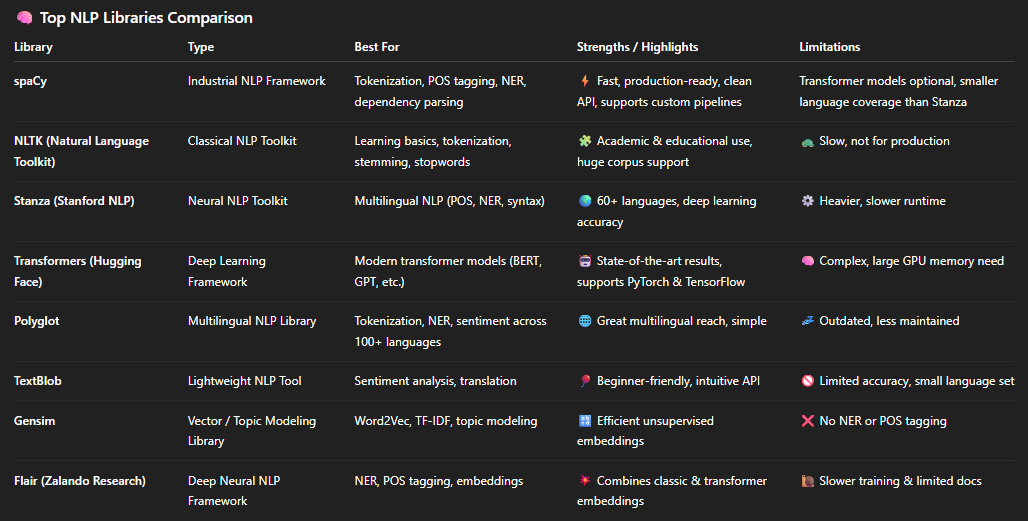

for lang in ["en_core_web_sm", "fr_core_news_sm", "de_core_news_sm"]:
This loop will run 3 times — once for English, once for French, and once for German.

nlp = spacy.load(lang)
Loads the language-specific model (each model has its tokenizer + grammar rules).

doc = nlp("L'homme aime les gâteaux.")
Runs the text through the model’s tokenizer + pipeline.
spaCy automatically splits it into tokens.

[t.text for t in doc]
Extracts the text of each token (so you can see what spaCy decided are words).

how tokenization differs between languages?

In [10]:
import spacy

for lang in ["en_core_web_sm", "fr_core_news_sm", "de_core_news_sm"]:
    nlp = spacy.load(lang)
    doc = nlp("L'homme aime les gâteaux.")
    print(f"\n Model: {lang}")
    print([t.text for t in doc])



 Model: en_core_web_sm
["L'homme", 'aime', 'les', 'gâteaux', '.']

 Model: fr_core_news_sm
["L'", 'homme', 'aime', 'les', 'gâteaux', '.']

 Model: de_core_news_sm
["L'homme", 'aime', 'les', 'gâteaux', '.']


Conclusion: Tokenization depends on language-specific rules , using the wrong model causes incorrect splits.

Neural networks can’t read text , they only understand numbers.
So before feeding data to a model, we convert each unique word (token) into a unique integer ID.This process is called vocabulary mapping or token-to-ID encoding.

In [11]:
tokens = ["hello", "world", "hello"] #suppose these are the list of tokens
vocab = {word: i for i, word in enumerate(set(tokens))} # set(tokens) removes duplicates → {'world', 'hello'} and enumerate(...) assigns an index to each token
ids = [vocab[w] for w in tokens] # Now we replace each token with its corresponding ID (from vocab)
print("Vocab:", vocab)
print("IDs:", ids)

#These IDs are what you feed into embedding layers or neural nets. It’s the first preprocessing step before training or inference.


Vocab: {'world': 0, 'hello': 1}
IDs: [1, 0, 1]


In [13]:
# Reverse Mapping (If you ever want to decode numbers back into words)
reverse_vocab = {i: w for w, i in vocab.items()}
decoded = [reverse_vocab[i] for i in ids]
print(decoded)


['hello', 'world', 'hello']


now build on my vocabulary mapping example we can see how the token IDs are transformed into embeddings (dense vectors).

In [14]:
tokens = ["hello", "world", "hello"]
vocab = {word: i for i, word in enumerate(set(tokens))}
ids = [vocab[w] for w in tokens]
print("Vocab:", vocab)
print("Token IDs:", ids)


Vocab: {'world': 0, 'hello': 1}
Token IDs: [1, 0, 1]


In [15]:
#Convert IDs into a Tensor
#Neural networks (especially in PyTorch) expect tensors as input why? because resource efficient and fast computation
import torch

input_ids = torch.tensor(ids)
print(input_ids)


tensor([1, 0, 1])


In [16]:
vocab_size = len(vocab)     # number of unique tokens , vocab size is 2 here
embedding_dim = 4           # how many dimensions per word vector, suppose 4

embedding = torch.nn.Embedding(vocab_size, embedding_dim)
embedded = embedding(input_ids)
print("Embedded vectors:\n", embedded)
#These embeddings are trainable,the model adjusts them to represent meaning.

Embedded vectors:
 tensor([[ 0.5781, -0.2228,  0.1850,  0.8292],
        [-1.4077, -0.1876,  0.1749,  0.0927],
        [ 0.5781, -0.2228,  0.1850,  0.8292]], grad_fn=<EmbeddingBackward0>)


In [17]:
print("Embedding matrix:\n", embedding.weight)

Embedding matrix:
 Parameter containing:
tensor([[-1.4077, -0.1876,  0.1749,  0.0927],
        [ 0.5781, -0.2228,  0.1850,  0.8292]], requires_grad=True)


 **Behind the scenes:**

> When `embedding = nn.Embedding(vocab_size, embedding_dim)` ran, PyTorch created a **weight matrix** of shape `[2 × 4]` because:
>
> * `vocab_size = 2` (two unique tokens)
> * `embedding_dim = 4` (each token has a 4-D vector).
>
> The initialized matrix (random values) was:
>
> ```
> [[-1.4077, -0.1876,  0.1749,  0.0927],   # token ID 0 → "world"
>  [ 0.5781, -0.2228,  0.1850,  0.8292]]   # token ID 1 → "hello"
> ```
>
> When `input_ids = [1, 0, 1]` passed through the embedding layer, PyTorch **looked up** those rows:
>
> ```
> [[ 0.5781, -0.2228,  0.1850,  0.8292],   # hello
>  [-1.4077, -0.1876,  0.1749,  0.0927],   # world
>  [ 0.5781, -0.2228,  0.1850,  0.8292]]   # hello again
> ```
>
> No training happens yet — these are random initial vectors.
> The layer simply performs a **table lookup**, not a calculation.
> `requires_grad=True` means these weights will later be updated during training to learn semantic meaning.


Word vs Subword Tokenization > Practical Example

Word-level tokenization treats each word as unique.
→ So if a word doesn’t exist in the vocabulary, it becomes <UNK>.

Subword-level tokenization breaks it into smaller familiar parts
→ letting the model handle rare or unseen words.



Byte Pair Encoding (BPE) from Scratch

The **Byte Pair Encoding (BPE)** concept in tokenization is a **data compression technique** adapted for text, aiming to strike a balance between **character-level** (too long sequences) and **word-level** (too large vocabulary) representations.

### 💡 BPE Concept: A Quick Summary

BPE works by iteratively merging the most frequent, adjacent pairs of bytes (or, in NLP, characters/subwords) in a text corpus into new, single subword tokens. This process continues until a pre-defined **vocabulary size** is reached or no more pairs meet a minimum frequency threshold.

* **Goal:** Efficiently handle Out-Of-Vocabulary (**OOV**) words (words not seen during training) by breaking them down into known subword units.
* **Result:** A vocabulary composed of individual characters and frequently occurring **subword units** (like 'ing', 'est', 'un', or 'tion').
* **Advantage:** Reduces the overall vocabulary size compared to pure word-level tokenization while allowing the model to process any word.

---

### 📝 Proper Example

Let's use a small corpus and a maximum of **3 merge operations**.

**Initial Corpus:**
`{'l o w': 5, 'l o w e r': 2, 'n e w e s t': 6, 'w i d e s t': 3}`
*(Initial vocabulary is all unique characters: {l, o, w, e, r, n, s, t, i, d} plus the space token.)*

#### 1. First Merge Operation

* **Most frequent adjacent pair:** `(e, s)` appears $2 + 6 + 3 = 11$ times.
* **New Token:** `es`
* **Updated Corpus:**
    `{'l o w': 5, 'l o w e r': 2, 'n e w es t': 6, 'w i d es t': 3}`

#### 2. Second Merge Operation

* **Most frequent adjacent pair:** `(es, t)` appears $6 + 3 = 9$ times.
* **New Token:** `est`
* **Updated Corpus:**
    `{'l o w': 5, 'l o w e r': 2, 'n e w est': 6, 'w i d est': 3}`

#### 3. Third Merge Operation

* **Most frequent adjacent pair:** `(l, o)` appears $5 + 2 = 7$ times.
* **New Token:** `lo`
* **Updated Corpus:**
    `{'lo w': 5, 'lo w e r': 2, 'n e w est': 6, 'w i d est': 3}`

---

### 🔑 Tokenizing a New Word

The final vocabulary now includes the merged subword tokens: `es`, `est`, and `lo`.

**New Word to Tokenize:** "**lowerest**"

* Using the learned merges: The word is broken down into known subword units:
    $$\text{"lowerest"} \rightarrow \mathbf{lo} \text{ w} \mathbf{e} \mathbf{r} \mathbf{e s t}$$
* **Tokens:** `lo`, `w`, `e`, `r`, `est`

BPE effectively tokenizes an unseen word (`lowerest`) into meaningful, frequently occurring subword units (`lo`, `est`) and characters/smaller units (`w`, `e`, `r`), thus managing the vocabulary size and OOV problem simultaneously.

In [23]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers

# 1. Initialize a new BPE tokenizer
tokenizer = Tokenizer(models.BPE())

# 2. Split text by whitespace before training
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# 3. Tiny sample corpus
corpus = [
    "play player playing",
    "run running runner",
    "swim swimming swimmer"
]

# 4. Train a small BPE model (vocab = 30 tokens)
trainer = trainers.BpeTrainer(vocab_size=30, min_frequency=1, show_progress=False)
tokenizer.train_from_iterator(corpus, trainer)

# 5. Check how BPE tokenizes new unseen words
test_words = ["played", "replaying", "runnerly", "swimmist"]
for word in test_words:
    tokens = tokenizer.encode(word).tokens
    print(f"{word:10s} -> {tokens}")



played     -> ['play', 'e']
replaying  -> ['r', 'e', 'playing']
runnerly   -> ['runner', 'l', 'y']
swimmist   -> ['swimm', 'i', 's']


This code uses GPT-2’s pretrained tokenizer, which was trained using Byte Pair Encoding (BPE) on 40 GB of internet text.
Its purpose is to convert your text → tokens → IDs (for the model),
and then back from IDs → text (for decoding).

What happens:

GPT-2 first converts the text to bytes (so it supports all characters, emojis, etc.).

Then it repeatedly merges the most frequent adjacent byte pairs (according to its trained merges.txt rules).

It adds a special space prefix character Ġ (U+0120) to indicate the start of a new word.

Decode reverses the process:
It looks up each ID’s token string.
Removes the Ġ marker and joins them properly into text.

In [29]:
from transformers import GPT2Tokenizer

# Load GPT-2’s pretrained tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "The strawberry problem occurs due to subword tokenization."

# Tokenize (text → tokens)
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

# Convert to IDs (text → numbers for model input)
ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", ids)

# Decode (IDs → text)
decoded = tokenizer.decode(ids)
print("Decoded text:", decoded)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Tokens: ['The', 'Ġstrawberry', 'Ġproblem', 'Ġoccurs', 'Ġdue', 'Ġto', 'Ġsub', 'word', 'Ġtoken', 'ization', '.']
Token IDs: [464, 41236, 1917, 8833, 2233, 284, 850, 4775, 11241, 1634, 13]
Decoded text: The strawberry problem occurs due to subword tokenization.


Explore how pretrained tokenizers handle unusual text , emojis, punctuation, compound words, rare terms.

Large Language Models (like GPT-2/3, BERT) use subword tokenization (e.g., BPE), so:

Common words = single token.

Rare/compound words = multiple smaller tokens.

Emojis & punctuation often split into Unicode sub-pieces.


In [34]:
from transformers import AutoTokenizer

# Load a pretrained GPT-2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

texts = ["Strawberry", "🧠 AI's future???", "new-york-based"]

for t in texts:
    tokens = tokenizer.tokenize(t)
    ids = tokenizer.convert_tokens_to_ids(tokens)
    print(f"\nText: {t}")
    print("Tokens:", tokens)
    print("Token IDs:", ids)
#Shows that models don’t see text like humans , they see token sequences.


Text: Strawberry
Tokens: ['St', 'raw', 'berry']
Token IDs: [1273, 1831, 8396]

Text: 🧠 AI's future???
Tokens: ['ðŁ', '§', 'ł', 'ĠAI', "'s", 'Ġfuture', '???']
Token IDs: [8582, 100, 254, 9552, 338, 2003, 28358]

Text: new-york-based
Tokens: ['new', '-', 'y', 'ork', '-', 'based']
Token IDs: [3605, 12, 88, 967, 12, 3106]


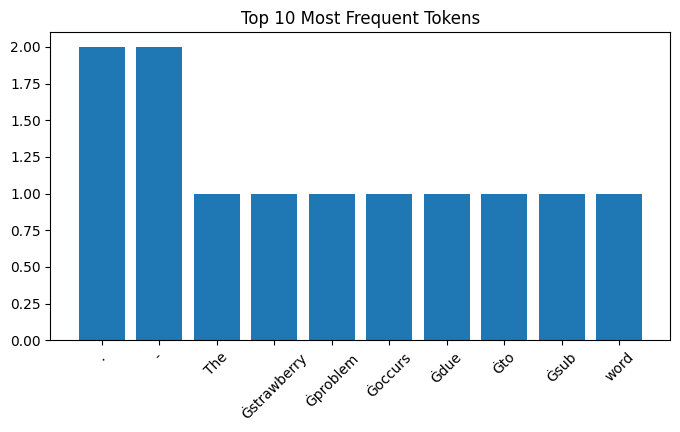

In [36]:
from transformers import AutoTokenizer
from collections import Counter
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained("gpt2")

texts = [
    "The strawberry problem occurs due to subword tokenization.",
    "Byte Pair Encoding is powerful for rare words like strawberries or New-York-based examples."
]

# Tokenize all and count frequency
all_tokens = []
for t in texts:
    all_tokens.extend(tokenizer.tokenize(t))

# Count most frequent tokens
freq = Counter(all_tokens).most_common(10)

# Plot
plt.figure(figsize=(8,4))
plt.bar([x[0] for x in freq], [x[1] for x in freq])
plt.title("Top 10 Most Frequent Tokens")
plt.xticks(rotation=45)
plt.show()


Token Counts

Every LLM (like GPT-3, GPT-4, etc.):

Has a limit (like 4,096 or 8,192 tokens max per prompt).

And charges you based on how many tokens you send or receive.

So before sending a prompt, it’s useful to know:

*   How many tokens your text uses
*   If it fits within the limit


That’s why we use a token counter to measure this automatically.

In [37]:
import tiktoken  # Library for token counting

# Load the tokenizer used by GPT-2
enc = tiktoken.get_encoding("gpt2")

# Your text
text = "The strawberry problem occurs due to subword tokenization."

# Convert the text into tokens (model-readable form)
tokens = enc.encode(text)

# Print tokens and their count
print("Tokens:", tokens)
print("Token count:", len(tokens))


Tokens: [464, 41236, 1917, 8833, 2233, 284, 850, 4775, 11241, 1634, 13]
Token count: 11


Tokenization affects how many tokens you feed:

If your text splits inefficiently (e.g., “Strawberry” → 3 tokens),
→ you pay + compute + latency for each extra token.

Efficient tokenization = fewer tokens = lower compute + cost.

So, tokenization efficiency directly impacts resource usage.